# Robo Rally 

In [1]:
import random as rd
import numpy aas np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

# Original game

In [2]:
def roborally(x=0,y=0,limit=100):
    a
    Move=['G','R','L']
    #G move 1 ,R turn right ,L turn left
    K=rd.randrange(5,limit,1)
    #k instructions ranging farom 5 to 100
    N,E,S,W=0,1,2,3
    dir= E
    #initial direction East
    seq=[]
    
    for i in range(K):
        seq.append(rd.choice(Move))
    #print(seq)

    for m in seq:
        if m == 'R': 
            dir = (dir + 1)%4
        elif m == 'L': 
            dir = (4 + dir - 1)%4
        else:    # if move == 'G' 
                if dir == N: 
                    y += 1
                elif dir == E: 
                    x += 1
                elif dir == S: 
                    y -= 1
                else: 
                    x -= 1
    return [x,y]

## Visualize the spread of robot's ending position

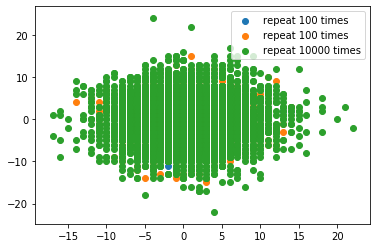

In [39]:

test=[100,1000,10000]
rest=np.array([roborally() for i in range(test[0])])
x,y=rest.T
rest1=np.array([roborally() for i in range(test[1])])
x1,y1=rest1.T
rest2=np.array([roborally() for i in range(test[2])])
x2,y2=rest2.T
plt.scatter(x, y,label='repeat 100 times')
plt.scatter(x1, y1,label='repeat 100 times')
plt.scatter(x2, y2,label='repeat 10000 times')
plt.legend()
plt.show()

In [42]:
rest=np.array([roborally() for i in range(100000)])
x,y=rest.T
print(max(abs(x)),max(abs(y)))

23 24


In [43]:
#repeat 1000000 times
rest=np.array([roborally() for i in range(1000000)])
x,y=rest.T
print(max(abs(x)),max(abs(y)))

30 28


If we repeat the game 1000000 times,the range may extend to above 24-30 range. Thus the probabilty of the robot falling off the board does depend on the size of the board.

# Extended project 1 : move more than 1 step is allowed

In [3]:

def roborally1(x=0,y=0,limit=100,step=5):
    
    Move=['G','R','L']
    #G move 1 ,R turn right ,L turn left
    K=rd.randrange(5,limit,1)
    #k instructions ranging from 5 to 100
    N,E,S,W=0,1,2,3
    dir= E
    #initial direction East
    seq=[]
    
    for i in range(K):
        seq.append(rd.choice(Move))
    #print(seq)

    for m in seq:
        s=rd.randrange(-step,step,1)
        #move forward or backward more than one
        if m == 'R': 
            dir = (dir + 1)%4
        elif m == 'L': 
            dir = (4 + dir - 1)%4
        else:    # if move == 'G' 
                if dir == N: 
                    y += s
                elif dir == E: 
                    x += s
                elif dir == S: 
                    y -= s
                else: 
                    x -= s
    return [x,y]

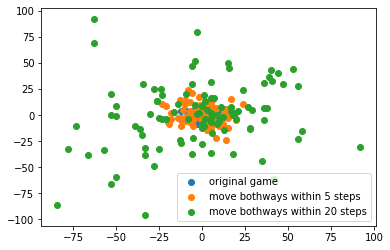

In [15]:
test=100
rest=np.array([roborally() for i in range(test)])
x,y=rest.T
rest1=np.array([roborally1() for i in range(test)])
x1,y1=rest1.T
rest2=np.array([roborally1(step=20) for i in range(test)])
x2,y2=rest2.T
plt.scatter(x, y,label='original game')
plt.scatter(x1, y1,label='move bothways within 5 steps')
plt.scatter(x2, y2,label='move bothways within 20 steps')
plt.legend()
plt.show()

Obviously larger the step size , wider the range. 

# Extended project 2 : rotation less than a quarter is allowed

In [23]:

def roborally2(x=0,y=0,limit=100,step=5):
    
    Move=['G','R','L']
    #G move 1 ,R turn right ,L turn left
    K=rd.randrange(5,limit,1)
    #k instructions ranging from 5 to 100
    N,NE,E,SE,S,SW,W,NW=0,1,2,3,4,5,6,7
    dir= E
    #initial direction East
    seq=[]
    
    for i in range(K):
        seq.append(rd.choice(Move))
    #print(seq)

    for m in seq:
        s=rd.randrange(-step,step,1)
        #move both ways more than 1 
        if m == 'R': 
            dir = (dir + 1)%8
        elif m == 'L': 
            dir = (8 + dir - 1)%8
        else:    # if move == 'G' 
                if dir == N: 
                    y += s
                elif dir == E: 
                    x += s
                elif dir == S: 
                    y -= s
                elif dir == W: 
                    x -= s
                elif dir == NE:
                    y += s
                    x += s
                elif dir == SE:
                    y -=s 
                    x +=s
                elif dir == SW:
                    y-=s 
                    x-=s
                else :
                    y+=s 
                    x-=s
    return [x,y]

## Visualize the spread of ending positions of three scenarios

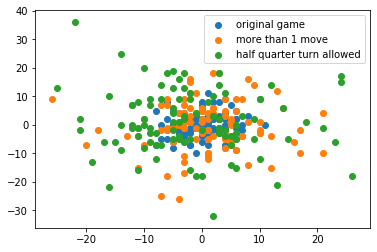

In [24]:
test=100
rest=np.array([roborally() for i in range(test)])
x,y=rest.T
rest1=np.array([roborally1() for i in range(test)])
x1,y1=rest1.T
rest2=np.array([roborally2() for i in range(test)])
x2,y2=rest2.T
plt.scatter(x, y,label='original game')
plt.scatter(x1, y1,label='more than 1 move')
plt.scatter(x2, y2,label='half quarter turn allowed')
plt.legend()
plt.show()

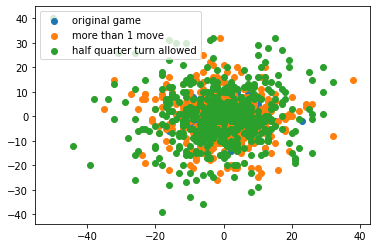

In [25]:
test=500
rest=np.array([roborally() for i in range(test)])
x,y=rest.T
rest1=np.array([roborally1() for i in range(test)])
x1,y1=rest1.T
rest2=np.array([roborally2() for i in range(test)])
x2,y2=rest2.T
plt.scatter(x, y,label='original game')
plt.scatter(x1, y1,label='more than 1 move')
plt.scatter(x2, y2,label='half quarter turn allowed')
plt.legend()
plt.show()

With the same step size, smaller the rotation angle ,wider the move range.

# Extended project 3: See the probability of hitting the hazard/ taget

### Set random target within chosen range

In [109]:
def roborally_process(x=0,y=0,limit=100,step=5,r=15):
    #r stands for target/hazard range 
    a,b=rd.randrange(-r,r,1),rd.randrange(-r,r,1)
    Move=['G','R','L']
    #G move 1 ,R turn right ,L turn left
    K=rd.randrange(5,limit,1)
    #k instructions ranging from 5 to 100
    N,E,S,W=0,1,2,3
    dir= E
    #initial direction East
    seq=[]
    
    for i in range(K):
        seq.append(rd.choice(Move))
    #print(seq)

    for m in seq:
        s=rd.randrange(-step,step,1)
        #move forward or backward more than one
        if m == 'R': 
            dir = (dir + 1)%4
        elif m == 'L': 
            dir = (4 + dir - 1)%4
        else:    # if move == 'G' 
                if dir == N: 
                    y += s
                elif dir == E: 
                    x += s
                elif dir == S: 
                    y -= s
                else: 
                    x -= s
        if x==a and y== b:
            return 1
    return 0

In [135]:
repeat=[100,500,1000,2000,5000,10000]
ans=[]
for i in range(len(repeat)):
    sum=0
    for i in range(repeat[i]):
        sum+=roborally_process(limit=100)
    ans.append(sum)
prob=[]
for i in range(len(repeat)):
    prob.append(ans[i]/repeat[i])
np.mean(prob)

0.0178

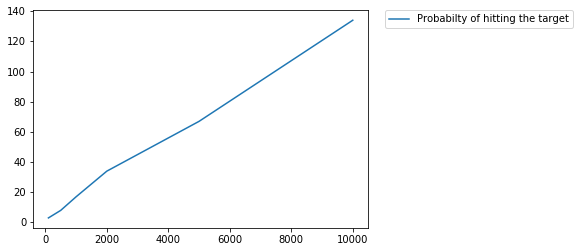

In [136]:
plt.plot(repeat,ans,label='Probabilty of hitting the target')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

### If each game with 100 sequence of moves,the probabilty of hitting the target is 0.0178

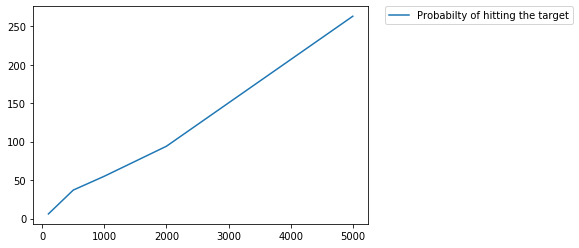

In [126]:
repeat=[100,500,1000,2000,5000]
ans=[]
for i in range(len(repeat)):
    sum=0
    for i in range(repeat[i]):
        sum+=roborally_process(limit=1000)
    ans.append(sum)
    
plt.plot(repeat,ans,label='Probabilty of hitting the target')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [134]:
prob=[]
for i in range(len(repeat)):
    prob.append(ans[i]/repeat[i])
np.mean(prob)

0.057719999999999994

#### If each game with 1000 sequence of moves,the probabilty of hitting the target is 0.05771

#### We can see more frequent the moves,higer the chance of hitting target or hazard